In [1]:
!pip install category_encoders

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import category_encoders as ce
from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score, average_precision_score
)
pd.set_option('display.max_columns', None)

ModuleNotFoundError: No module named 'category_encoders'

In [8]:
balanced_df1 = pd.read_csv("balanced_data.csv")

display(balanced_df1.head())

print(f"\nShape: {balanced_df1.shape}")

balanced_df1.info()

balanced_df1.columns

display(balanced_df1.describe())

print(balanced_df1.isnull().sum())

balanced_df1.dtypes

,cc_num,merchant,category,amt,first,last,gender,street,city,state,...,long,city_pop,job,dob,trans_num,unix_time,merch_lat,merch_long,is_fraud,full_name
0,6.564460e+15,"fraud_Jenkins, Hauck and Friesen",gas_transport,75.79,Douglas,Willis,M,619 Jeremy Garden Apt. 681,Benton,WI,...,-90.3508,1306,Public relations officer,1958,ade47e682350050b6de3248597a969f6,1387767028,43.522950,-91.270081,0,Douglas Willis
1,4.451950e+15,fraud_Schuppe LLC,entertainment,81.57,Joseph,Davis,M,941 Adam Stravenue,Nazareth,TX,...,-102.1069,686,Petroleum engineer,1980,36d5d498cb99b600b05f9a99f9e2e45a,1372895074,34.214647,-101.425936,0,Joseph Davis
2,3.780060e+14,fraud_Lockman Ltd,grocery_pos,311.92,Christopher,Matthews,M,433 John Heights Apt. 849,Etlan,VA,...,-78.2638,395,Senior tax professional/tax inspector,1982,cac039caa0aa42f0f68d72502151c34f,1384475389,39.006783,-79.036502,1,Christopher Matthews
3,3.708190e+14,fraud_Johns Inc,entertainment,8.21,John,Davis,M,9670 Monroe Junctions,Rockwood,PA,...,-79.1865,3684,General practice doctor,1976,7d36e9d6c59798d9f68d889584cb99bd,1374241810,40.397423,-79.586829,0,John Davis
4,1.800680e+14,fraud_Frami Group,entertainment,2.32,Mary,Juarez,F,35440 Ryan Islands,North Prairie,WI,...,-88.3950,2328,Applications developer,1942,1c50094273dd6037891e81c3d0934d85,1387026602,43.016038,-88.425097,0,Mary Juarez



Shape: (10000, 22)
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10000 entries, 0 to 9999
Data columns (total 22 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   cc_num      10000 non-null  float64
 1   merchant    10000 non-null  object 
 2   category    10000 non-null  object 
 3   amt         10000 non-null  float64
 4   first       10000 non-null  object 
 5   last        10000 non-null  object 
 6   gender      10000 non-null  object 
 7   street      10000 non-null  object 
 8   city        10000 non-null  object 
 9   state       10000 non-null  object 
 10  zip         10000 non-null  int64  
 11  lat         10000 non-null  float64
 12  long        10000 non-null  float64
 13  city_pop    10000 non-null  int64  
 14  job         10000 non-null  object 
 15  dob         10000 non-null  int64  
 16  trans_num   10000 non-null  object 
 17  unix_time   10000 non-null  int64  
 18  merch_lat   10000 non-null  float64
 19  merch_

,cc_num,amt,zip,lat,long,city_pop,dob,unix_time,merch_lat,merch_long,is_fraud
count,1.000000e+04,10000.000000,10000.000000,10000.000000,10000.000000,1.000000e+04,10000.000000,1.000000e+04,10000.000000,10000.000000,10000.000000
mean,4.362545e+17,165.811818,48656.770300,38.612162,-90.298106,7.783886e+04,1973.020900,1.380415e+09,38.609157,-90.299315,0.214500
std,1.340442e+18,292.872795,26861.090235,5.055117,13.763778,2.623066e+05,17.383362,5.070100e+06,5.084692,13.772928,0.410496
min,6.041621e+10,1.000000,1257.000000,20.027100,-165.672300,2.300000e+01,1924.000000,1.371817e+09,19.161782,-166.509533,0.000000
25%,3.879740e+13,12.912500,26041.000000,34.699875,-96.745600,7.820000e+02,1962.000000,1.375932e+09,34.784734,-96.884139,0.000000
50%,3.514900e+15,56.760000,48088.000000,39.412500,-87.591700,2.607000e+03,1975.000000,1.380299e+09,39.445492,-87.527878,0.000000
75%,4.629450e+15,127.555000,71762.000000,42.076500,-80.175200,1.823850e+04,1987.000000,1.385399e+09,42.049199,-80.157098,0.000000
max,4.992350e+18,8517.380000,99921.000000,64.755600,-67.950300,2.906700e+06,2005.000000,1.388533e+09,65.549618,-66.960745,1.000000


cc_num        0
merchant      0
category      0
amt           0
first         0
last          0
gender        0
street        0
city          0
state         0
zip           0
lat           0
long          0
city_pop      0
job           0
dob           0
trans_num     0
unix_time     0
merch_lat     0
merch_long    0
is_fraud      0
full_name     0
dtype: int64


cc_num        float64
merchant       object
category       object
amt           float64
first          object
last           object
gender         object
street         object
city           object
state          object
zip             int64
lat           float64
long          float64
city_pop        int64
job            object
dob             int64
trans_num      object
unix_time       int64
merch_lat     float64
merch_long    float64
is_fraud        int64
full_name      object
dtype: object

In [ ]:
num_cols = balanced_df1.select_dtypes(include=['float64', 'int64']).columns.drop(['is_fraud'])
cat_cols = balanced_df1.select_dtypes(include='object').columns

In [14]:
balanced_df1['is_fraud'].value_counts()


is_fraud
0    7855
1    2145
Name: count, dtype: int64

In [ ]:
for col in num_cols:
    plt.figure(figsize=(6, 3))
    sns.histplot(balanced_df1[col], bins=50, kde=True)
    plt.title(f'Distribution of {col}')
    plt.show()

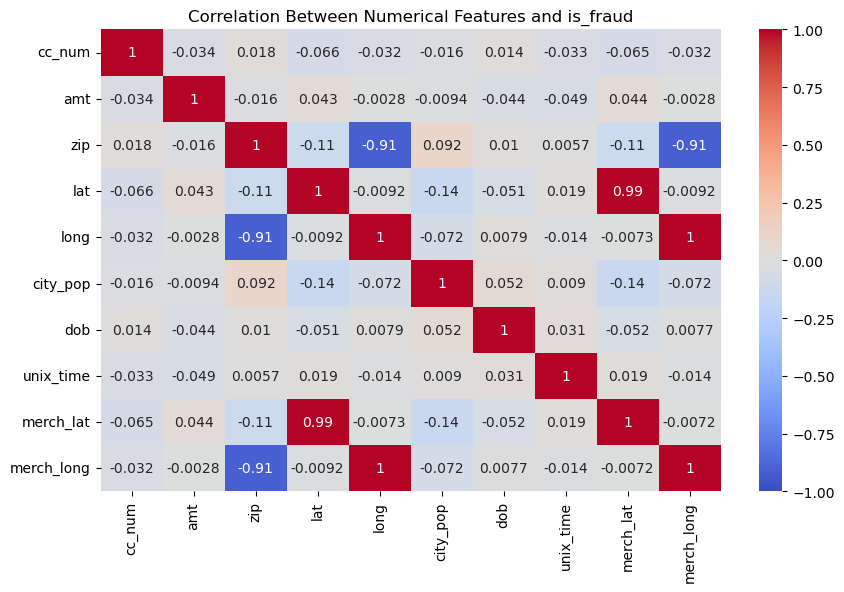

In [6]:
# calculate correlation matrix
num_df = balanced_df1[num_cols]
correlation_matrix = num_df.corr()

# plot heatmap
plt.figure(figsize=(10, 6))
sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', vmin=-1, vmax=1)
plt.title("Correlation Between Numerical Features and is_fraud")
plt.show()

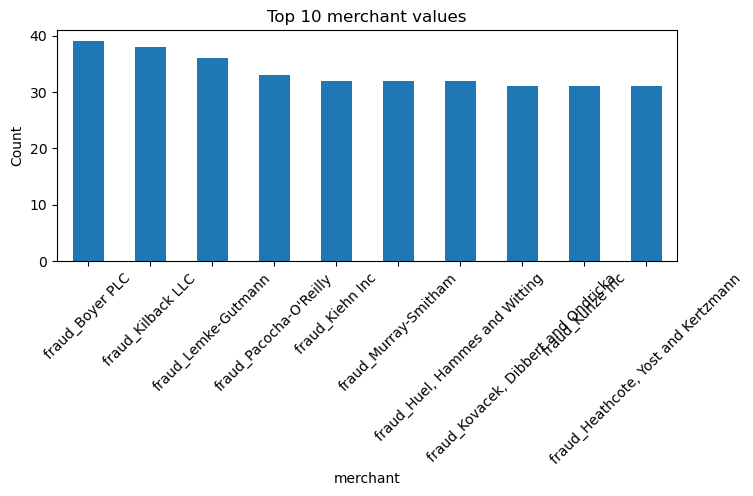

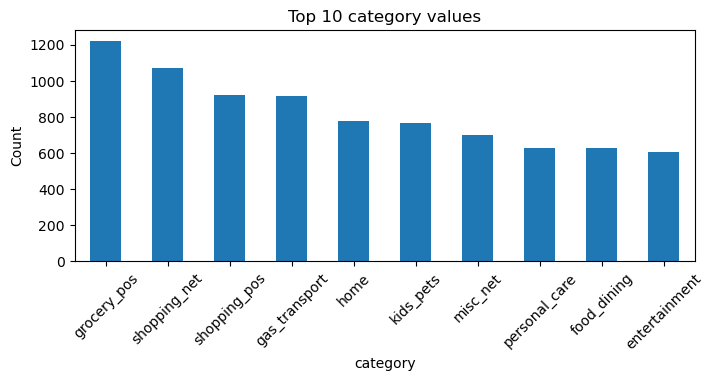

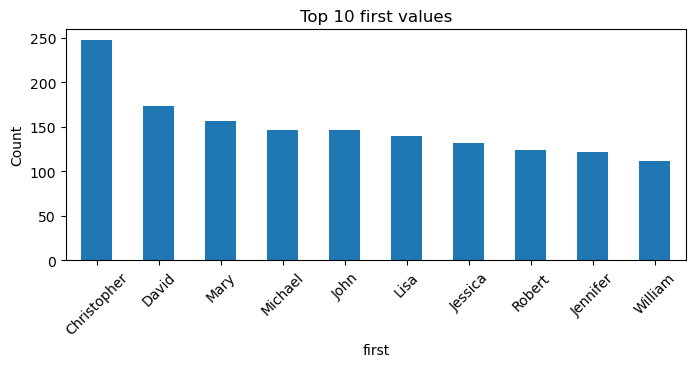

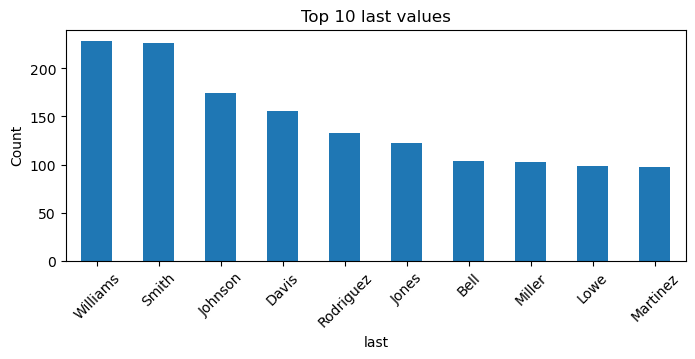

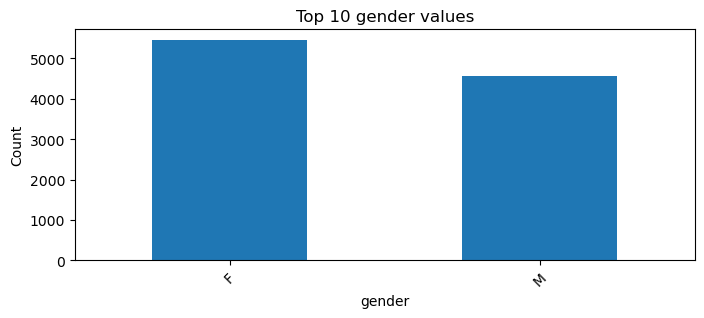

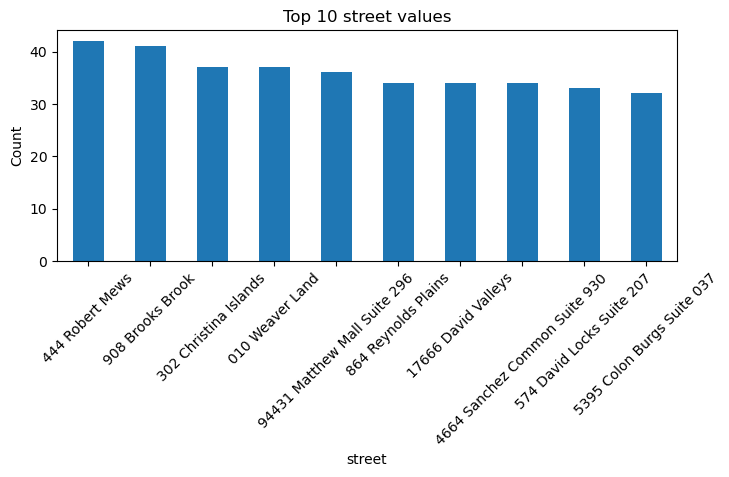

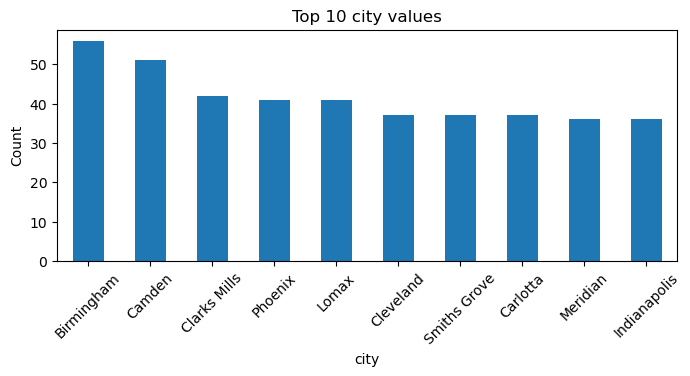

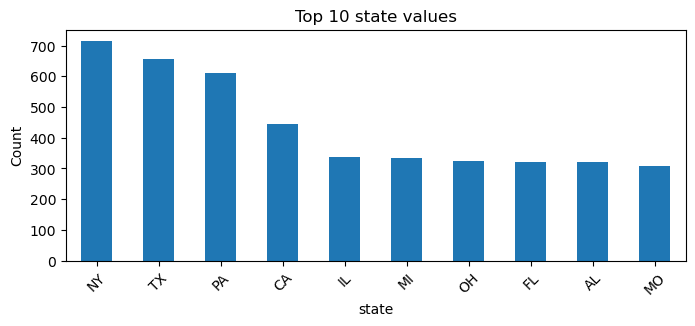

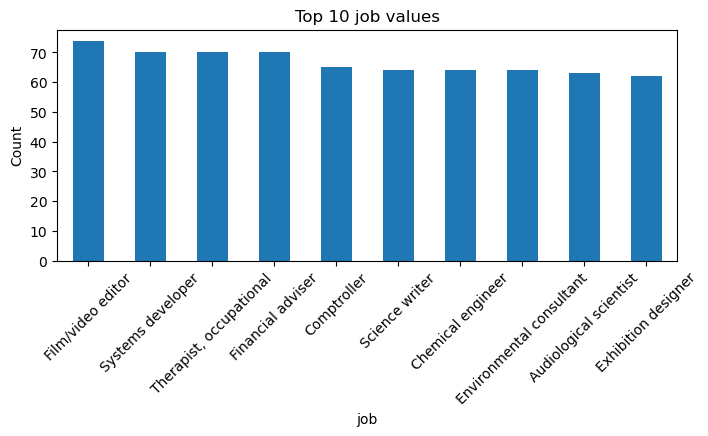

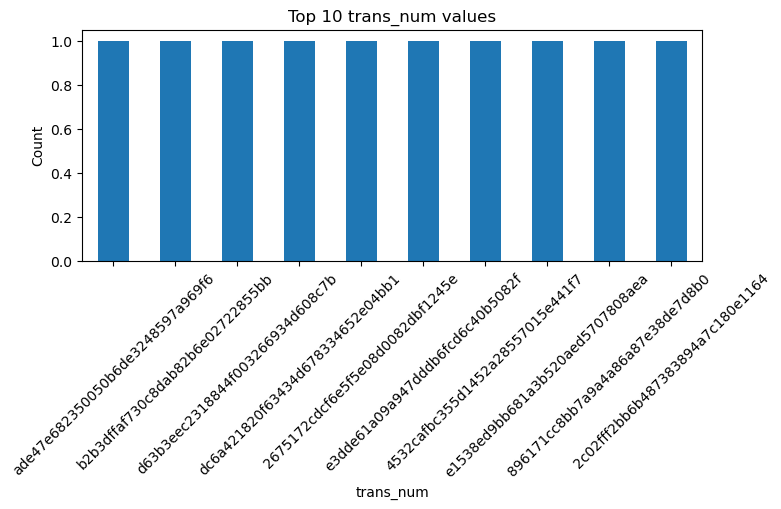

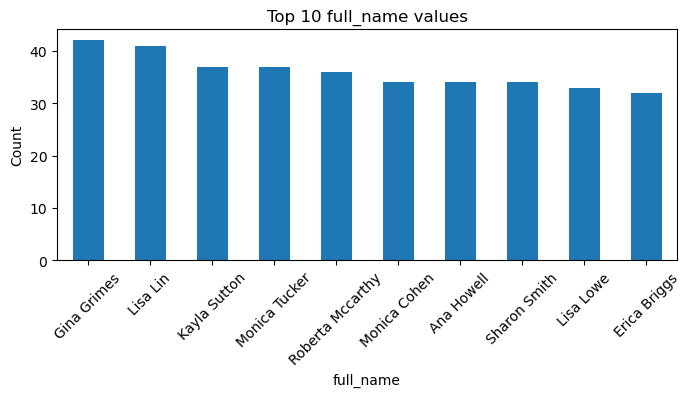

In [7]:
# cat graphs
for col in cat_cols:
    plt.figure(figsize=(8, 3))
    balanced_df1[col].value_counts().head(10).plot(kind='bar')
    plt.title(f'Top 10 {col} values')
    plt.ylabel('Count')
    plt.xticks(rotation=45)
    plt.show()

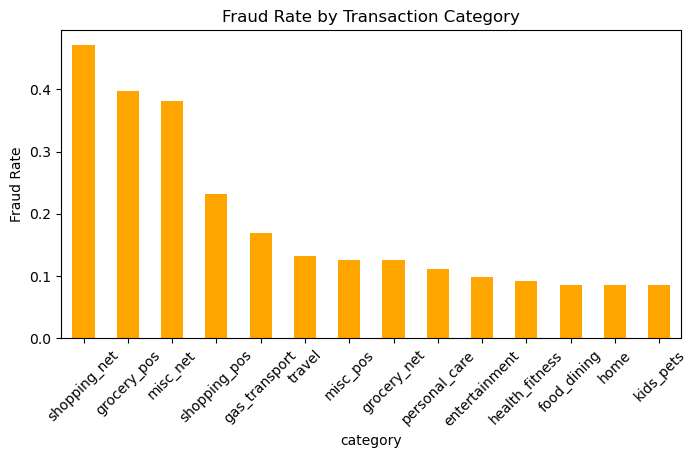

In [8]:
fraud_cat = balanced_df1.groupby('category')['is_fraud'].mean().sort_values(ascending=False)
fraud_cat.plot(kind='bar', figsize=(8,4), color='orange')
plt.title('Fraud Rate by Transaction Category')
plt.ylabel('Fraud Rate')
plt.xticks(rotation=45)
plt.show()


In [9]:
# copy and keep only rows with known target for fitting encoders/scaler
df = balanced_df1.dropna(subset=['is_fraud']).copy()

In [10]:
# drop IDs / low-signal identifiers
df = df.drop(columns=['cc_num', 'trans_num'], errors='ignore')

In [11]:
# frequency encode (full_name, zip)
for col in ['full_name', 'zip']:
    counts = df[col].astype('object').value_counts()
    df[f'{col}_freq'] = df[col].map(counts).fillna(0).astype('int64')

In [12]:
# target encode (merchant, category, job) – avoid leakage by fitting on train only in practice
#te_cols = ['merchant', 'category', 'job']
#te = ce.TargetEncoder(cols=te_cols, smoothing=10)
#te_df = te.fit_transform(balanced_model_df1[te_cols], balanced_model_df1['is_fraud'])
#te_df.columns = [c + '_te' for c in te_df.columns]
#balanced_model_df1 = pd.concat([balanced_model_df1.drop(columns=te_cols), te_df], axis=1)

In [13]:
# unix_time -> time features
tx_dt = pd.to_datetime(df['unix_time'], unit='s', errors='coerce')
df['hour']       = tx_dt.dt.hour
df['dow']        = tx_dt.dt.dayofweek
df['is_night']   = ((df['hour'] < 6) | (df['hour'] >= 18)).astype('int64')
df['is_weekend'] = (df['dow'] >= 5).astype('int64')

In [14]:
#age from birth year (dob is a YEAR, e.g., 1969)
#    age = transaction_year - dob_year
df['tx_year'] = tx_dt.dt.year
df['dob'] = pd.to_numeric(df['dob'], errors='coerce')
df['age'] = (df['tx_year'] - df['dob']).clip(lower=0).fillna(0).astype('int64')

In [15]:
df.head()

,merchant,category,amt,first,last,gender,street,city,state,zip,lat,long,city_pop,job,dob,unix_time,merch_lat,merch_long,is_fraud,full_name,full_name_freq,zip_freq,hour,dow,is_night,is_weekend,tx_year,age
0,"fraud_Jenkins, Hauck and Friesen",gas_transport,75.79,Douglas,Willis,M,619 Jeremy Garden Apt. 681,Benton,WI,53803,42.5545,-90.3508,1306,Public relations officer,1958,1387767028,43.522950,-91.270081,0,Douglas Willis,6,6,2,0,1,0,2013,55
1,fraud_Schuppe LLC,entertainment,81.57,Joseph,Davis,M,941 Adam Stravenue,Nazareth,TX,79063,34.5444,-102.1069,686,Petroleum engineer,1980,1372895074,34.214647,-101.425936,0,Joseph Davis,14,14,23,2,1,0,2013,33
2,fraud_Lockman Ltd,grocery_pos,311.92,Christopher,Matthews,M,433 John Heights Apt. 849,Etlan,VA,22719,38.5095,-78.2638,395,Senior tax professional/tax inspector,1982,1384475389,39.006783,-79.036502,1,Christopher Matthews,13,13,0,4,1,0,2013,31
3,fraud_Johns Inc,entertainment,8.21,John,Davis,M,9670 Monroe Junctions,Rockwood,PA,15557,39.9373,-79.1865,3684,General practice doctor,1976,1374241810,40.397423,-79.586829,0,John Davis,8,8,13,4,0,0,2013,37
4,fraud_Frami Group,entertainment,2.32,Mary,Juarez,F,35440 Ryan Islands,North Prairie,WI,53153,42.9385,-88.3950,2328,Applications developer,1942,1387026602,43.016038,-88.425097,0,Mary Juarez,13,13,13,5,0,1,2013,71


In [16]:
df.dtypes

merchant           object
category           object
amt               float64
first              object
last               object
gender             object
street             object
city               object
state              object
zip                 int64
lat               float64
long              float64
city_pop            int64
job                object
dob                 int64
unix_time           int64
merch_lat         float64
merch_long        float64
is_fraud            int64
full_name          object
full_name_freq      int64
zip_freq            int64
hour                int32
dow                 int32
is_night            int64
is_weekend          int64
tx_year             int32
age                 int64
dtype: object

In [17]:
drop_cols = [
    'full_name', 'first', 'last', 'street',
    'lat', 'long',
    'dob', 'tx_year', 'zip', 'unix_time'  
]
df = df.drop(columns=drop_cols, errors='ignore')

for col in ['city', 'state']:
    if col in df.columns:
        counts = df[col].astype(str).value_counts()
        df[f'{col}_freq'] = df[col].astype(str).map(counts).fillna(0).astype('int64')
df = df.drop(columns=['city', 'state'], errors='ignore')

df = pd.get_dummies(df, columns=['gender'], drop_first=True)

print(df.shape)
df.head()

(10000, 18)


,merchant,category,amt,city_pop,job,merch_lat,merch_long,is_fraud,full_name_freq,zip_freq,hour,dow,is_night,is_weekend,age,city_freq,state_freq,gender_M
0,"fraud_Jenkins, Hauck and Friesen",gas_transport,75.79,1306,Public relations officer,43.522950,-91.270081,0,6,6,2,0,1,0,55,6,255,True
1,fraud_Schuppe LLC,entertainment,81.57,686,Petroleum engineer,34.214647,-101.425936,0,14,14,23,2,1,0,33,14,655,True
2,fraud_Lockman Ltd,grocery_pos,311.92,395,Senior tax professional/tax inspector,39.006783,-79.036502,1,13,13,0,4,1,0,31,13,244,True
3,fraud_Johns Inc,entertainment,8.21,3684,General practice doctor,40.397423,-79.586829,0,8,8,13,4,0,0,37,8,611,True
4,fraud_Frami Group,entertainment,2.32,2328,Applications developer,43.016038,-88.425097,0,13,13,13,5,0,1,71,13,255,False


In [18]:
df.dtypes

merchant           object
category           object
amt               float64
city_pop            int64
job                object
merch_lat         float64
merch_long        float64
is_fraud            int64
full_name_freq      int64
zip_freq            int64
hour                int32
dow                 int32
is_night            int64
is_weekend          int64
age                 int64
city_freq           int64
state_freq          int64
gender_M             bool
dtype: object

In [19]:
import numpy as np
import pandas as pd
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.compose import ColumnTransformer
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import (
    classification_report, confusion_matrix, roc_auc_score,
    roc_curve, precision_recall_curve, average_precision_score
)

df.drop(columns=['hour'], inplace=True, errors='ignore')
df = pd.get_dummies(df, columns=['dow'], drop_first=True)


y = df['is_fraud'].astype('int64')
X = df.drop(columns=['is_fraud'])

X_train, X_val, y_train, y_val = train_test_split(
    X, y, test_size=0.20, random_state=42, stratify=y
)


# --- Target encode merchant/category/job on TRAIN ONLY (no leakage) ---
te_cols = [c for c in ['merchant', 'category', 'job'] if c in X_train.columns]
if te_cols:
    te = ce.TargetEncoder(cols=te_cols, smoothing=10)
    X_train_te = te.fit_transform(X_train[te_cols], y_train)
    X_val_te   = te.transform(X_val[te_cols])

    # Drop original string cols and add *_te back
    X_train = pd.concat([X_train.drop(columns=te_cols), X_train_te.add_suffix('_te')], axis=1)
    X_val   = pd.concat([X_val.drop(columns=te_cols),   X_val_te.add_suffix('_te')],   axis=1)

# --- Build preprocessing (scale continuous only; passthrough binary/dummies) ---
# Identify binary-like columns (0/1) to passthrough
def find_binary_columns(df_):
    bin_cols_ = []
    for c in df_.columns:
        if pd.api.types.is_numeric_dtype(df_[c]):
            vals = df_[c].dropna().unique()
            if len(vals) <= 2 and set(vals).issubset({0, 1}):
                bin_cols_.append(c)
    return bin_cols_

binary_like = find_binary_columns(X_train)
cont_cols   = [c for c in X_train.columns if c not in binary_like]

preprocess = ColumnTransformer(
    transformers=[
        ('scale', StandardScaler(), cont_cols),
        ('pass_bin', 'passthrough', binary_like),
    ],
    remainder='drop'
)

# --- Logistic Regression pipeline ---
logit = LogisticRegression(solver='lbfgs', max_iter=2000)
pipe = Pipeline(steps=[('prep', preprocess), ('model', logit)])

# --- Fit & Evaluate ---
pipe.fit(X_train, y_train)

y_val_pred  = pipe.predict(X_val)
y_val_proba = pipe.predict_proba(X_val)[:, 1]

print("Confusion matrix:\n", confusion_matrix(y_val, y_val_pred))
print("\nClassification report:\n", classification_report(y_val, y_val_pred, digits=4))
print(f"ROC AUC: {roc_auc_score(y_val, y_val_proba):.4f}")
print(f"Average Precision (PR AUC): {average_precision_score(y_val, y_val_proba):.4f}")


Confusion matrix:
 [[1502   69]
 [ 138  291]]

Classification report:
               precision    recall  f1-score   support

           0     0.9159    0.9561    0.9355      1571
           1     0.8083    0.6783    0.7376       429

    accuracy                         0.8965      2000
   macro avg     0.8621    0.8172    0.8366      2000
weighted avg     0.8928    0.8965    0.8931      2000

ROC AUC: 0.9409
Average Precision (PR AUC): 0.8413


In [20]:


# Get feature names after preprocessing
prep = pipe.named_steps['prep']
feat_names = prep.get_feature_names_out()
feat_names = [n.split("__", 1)[-1] for n in feat_names]

# Get coefficients from logistic regression
coefs = pipe.named_steps['model'].coef_[0]

# Build dataframe
coef_df = pd.DataFrame({
    "feature": feat_names,
    "coef": coefs,
    "odds_ratio": np.exp(coefs),
    "abs_coef": np.abs(coefs)
})

# Top 15 by absolute coefficient
top15 = coef_df.sort_values("abs_coef", ascending=False).head(15)
print("\nTop 15 features by |coefficient|:")
display(top15)

# Top 10 positive
top_pos = coef_df.sort_values("coef", ascending=False).head(10)
print("\nTop 10 positive (increase odds of fraud):")
display(top_pos)

# Top 10 negative
top_neg = coef_df.sort_values("coef", ascending=True).head(10)
print("\nTop 10 negative (decrease odds of fraud):")
display(top_neg)


Top 15 features by |coefficient|:


,feature,coef,odds_ratio,abs_coef
12,is_night,2.284672,9.822464,2.284672
0,amt,1.863078,6.443538,1.863078
11,job_te,1.258904,3.521561,1.258904
9,merchant_te,0.985177,2.678286,0.985177
10,category_te,-0.697209,0.497973,0.697209
4,full_name_freq,0.564433,1.758451,0.564433
13,is_weekend,-0.545601,0.579494,0.545601
19,dow_5,-0.303243,0.738420,0.303243
17,dow_3,-0.292778,0.746188,0.292778
20,dow_6,-0.242358,0.784775,0.242358



Top 10 positive (increase odds of fraud):


,feature,coef,odds_ratio,abs_coef
12,is_night,2.284672,9.822464,2.284672
0,amt,1.863078,6.443538,1.863078
11,job_te,1.258904,3.521561,1.258904
9,merchant_te,0.985177,2.678286,0.985177
4,full_name_freq,0.564433,1.758451,0.564433
6,age,0.159387,1.172791,0.159387
14,gender_M,0.139614,1.149829,0.139614
16,dow_2,0.035588,1.036229,0.035588
7,city_freq,0.019742,1.019938,0.019742
1,city_pop,-0.009857,0.990191,0.009857



Top 10 negative (decrease odds of fraud):


,feature,coef,odds_ratio,abs_coef
10,category_te,-0.697209,0.497973,0.697209
13,is_weekend,-0.545601,0.579494,0.545601
19,dow_5,-0.303243,0.738420,0.303243
17,dow_3,-0.292778,0.746188,0.292778
20,dow_6,-0.242358,0.784775,0.242358
18,dow_4,-0.219809,0.802672,0.219809
15,dow_1,-0.187476,0.829049,0.187476
5,zip_freq,-0.130463,0.877689,0.130463
2,merch_lat,-0.085775,0.917801,0.085775
8,state_freq,-0.073435,0.929197,0.073435


In [19]:
list(X_train.columns)

['amt',
 'city_pop',
 'merch_lat',
 'merch_long',
 'full_name_freq',
 'zip_freq',
 'is_night',
 'is_weekend',
 'age',
 'city_freq',
 'state_freq',
 'gender_M',
 'hour_1',
 'hour_2',
 'hour_3',
 'hour_4',
 'hour_5',
 'hour_6',
 'hour_7',
 'hour_8',
 'hour_9',
 'hour_10',
 'hour_11',
 'hour_12',
 'hour_13',
 'hour_14',
 'hour_15',
 'hour_16',
 'hour_17',
 'hour_18',
 'hour_19',
 'hour_20',
 'hour_21',
 'hour_22',
 'hour_23',
 'dow_1',
 'dow_2',
 'dow_3',
 'dow_4',
 'dow_5',
 'dow_6',
 'merchant_te',
 'category_te',
 'job_te']

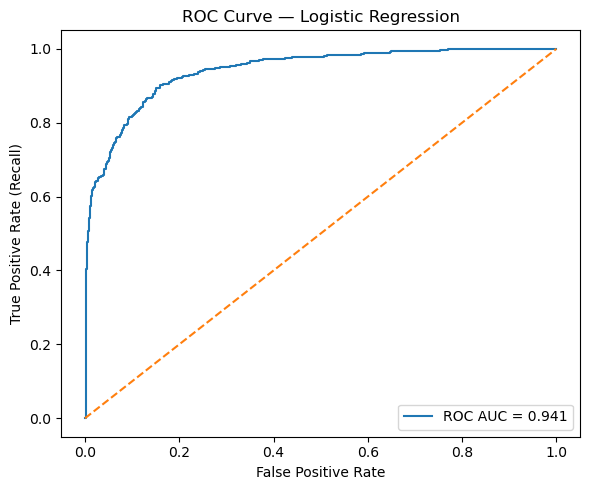

In [21]:
from sklearn.metrics import roc_curve, roc_auc_score
import matplotlib.pyplot as plt

fpr, tpr, roc_thresh = roc_curve(y_val, y_val_proba)
roc_auc = roc_auc_score(y_val, y_val_proba)

plt.figure(figsize=(6, 5))
plt.plot(fpr, tpr, label=f"ROC AUC = {roc_auc:.3f}")
plt.plot([0, 1], [0, 1], linestyle="--")
plt.xlabel("False Positive Rate")
plt.ylabel("True Positive Rate (Recall)")
plt.title("ROC Curve — Logistic Regression")
plt.legend(loc="lower right")
plt.tight_layout()
plt.show()
# Optional: save
# plt.savefig("roc_curve.png", dpi=200, bbox_inches="tight")


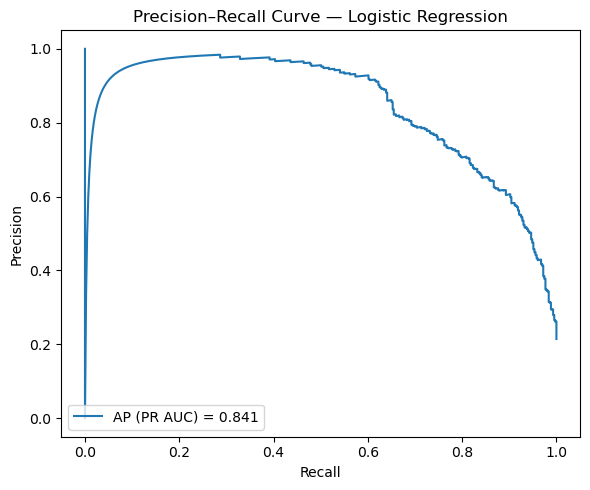

In [22]:
from sklearn.metrics import precision_recall_curve, average_precision_score

prec, rec, pr_thresh = precision_recall_curve(y_val, y_val_proba)
ap = average_precision_score(y_val, y_val_proba)

plt.figure(figsize=(6, 5))
plt.plot(rec, prec, label=f"AP (PR AUC) = {ap:.3f}")
plt.xlabel("Recall")
plt.ylabel("Precision")
plt.title("Precision–Recall Curve — Logistic Regression")
plt.legend(loc="lower left")
plt.tight_layout()
plt.show()
# Optional: save
# plt.savefig("pr_curve.png", dpi=200, bbox_inches="tight")
